In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def return_schedule(step_scheduler, ddim_steps_student=64, steps=64, gradient_updates=5000):
    if step_scheduler == "iterative":
            halvings = math.floor(math.log(64)/math.log(2))  
            updates_per_halving = int(gradient_updates / halvings)
            step_sizes = []
            for i in range(halvings):
                step_sizes.append(int((steps) / (2**i)))
            update_list = []
            for i in step_sizes:
                update_list.append(int(updates_per_halving / int(i/ 2)))
    elif step_scheduler == "naive":
        step_sizes=[ddim_steps_student]
        update_list=[gradient_updates // int(ddim_steps_student / 2)]
    elif step_scheduler == "gradual_linear":
        step_sizes = np.arange(steps, 0, -2)
        update_list = (1/len(np.append(step_sizes[1:], 1)) * gradient_updates / np.append(step_sizes[1:], 1)).astype(int)
    elif step_scheduler == "gradual_exp":
        step_sizes = np.arange(64, 0, -2)
        update_list = np.exp(1 / np.append(step_sizes[1:],1)) / np.sum(np.exp(1 / np.append(step_sizes[1:],1)))
        update_list = (update_list * gradient_updates /  np.append(step_sizes[1:],1)).astype(int)

    return step_sizes, update_list

In [3]:
def return_witnessed(step_sizes, update_list, cosine=False):
    witness = dict()
    count = 0
    start_lr = 1.0
    end_lr = 0.1
    num_steps = 5000

    # Generate the cosine annealing learning rate schedule
    cosine_annealing_lr = [end_lr + 0.5 * (start_lr - end_lr) * (1 + math.cos(math.pi * i / num_steps)) for i in range(num_steps)]

    for i, step in enumerate(step_sizes):
        updates = update_list[i]
        for j in range(updates):
            for k in range(2, step+2, 2):
                try:
                    count += 1
                    if cosine == False:
                        witness[k] += 1 
                    else:
                        witness[k] += 1 * cosine_annealing_lr[count]
                except:
                    witness[k] = 1
    return witness

In [7]:
iterative = return_witnessed(*return_schedule("iterative"))
naive = return_witnessed(*return_schedule("naive"))
gradual_linear = return_witnessed(*return_schedule("gradual_linear"))
gradual_exp = return_witnessed(*return_schedule("gradual_exp"))


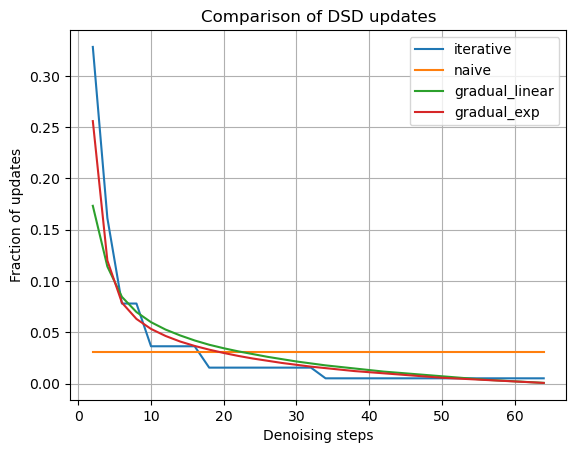

In [5]:
# Scale the values and limit the x-axis
x = list(iterative.keys())[:32]
iterative_values = np.array(list(iterative.values()))[:32] / np.sum(list(iterative.values())[:32])
naive_values = np.array(list(naive.values()))[:32] / np.sum(list(naive.values())[:32])
gradual_linear_values = np.array(list(gradual_linear.values()))[:32] / np.sum(list(gradual_linear.values())[:32])
gradual_exp_values = np.array(list(gradual_exp.values()))[:32] / np.sum(list(gradual_exp.values())[:32])

# Plot the scaled values
plt.plot(x, iterative_values, label="iterative")
plt.plot(x, naive_values, label="naive")
plt.plot(x, gradual_linear_values, label="gradual_linear")
plt.plot(x, gradual_exp_values, label="gradual_exp")
plt.legend()
plt.xlabel("Denoising steps")
plt.grid()
plt.title("Comparison of DSD updates")
plt.ylabel("Fraction of updates")
plt.show()

In [6]:
iterative = return_witnessed(*return_schedule("iterative"), cosine=True)
naive = return_witnessed(*return_schedule("naive"), cosine=True)
gradual_linear = return_witnessed(*return_schedule("gradual_linear"), cosine=True)
gradual_exp = return_witnessed(*return_schedule("gradual_exp"), cosine=True)

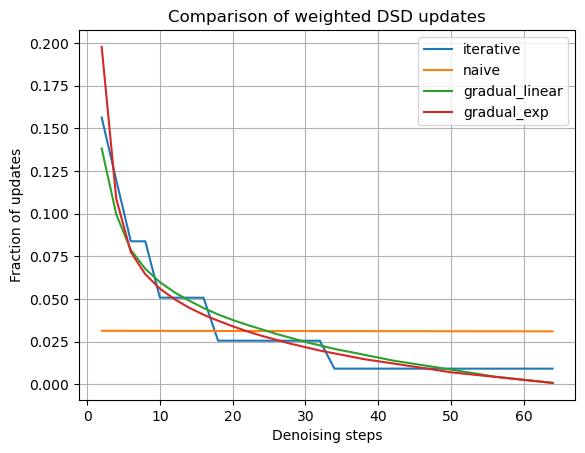

In [7]:
# Scale the values and limit the x-axis
x = list(iterative.keys())[:32]
iterative_values = np.array(list(iterative.values()))[:32] / np.sum(list(iterative.values())[:32])
naive_values = np.array(list(naive.values()))[:32] / np.sum(list(naive.values())[:32])
gradual_linear_values = np.array(list(gradual_linear.values()))[:32] / np.sum(list(gradual_linear.values())[:32])
gradual_exp_values = np.array(list(gradual_exp.values()))[:32] / np.sum(list(gradual_exp.values())[:32])

# Plot the scaled values
plt.plot(x, iterative_values, label="iterative")
plt.plot(x, naive_values, label="naive")
plt.plot(x, gradual_linear_values, label="gradual_linear")
plt.plot(x, gradual_exp_values, label="gradual_exp")
plt.legend()
plt.xlabel("Denoising steps")
plt.grid()
plt.title("Comparison of weighted DSD updates")
plt.ylabel("Fraction of updates")
plt.show()

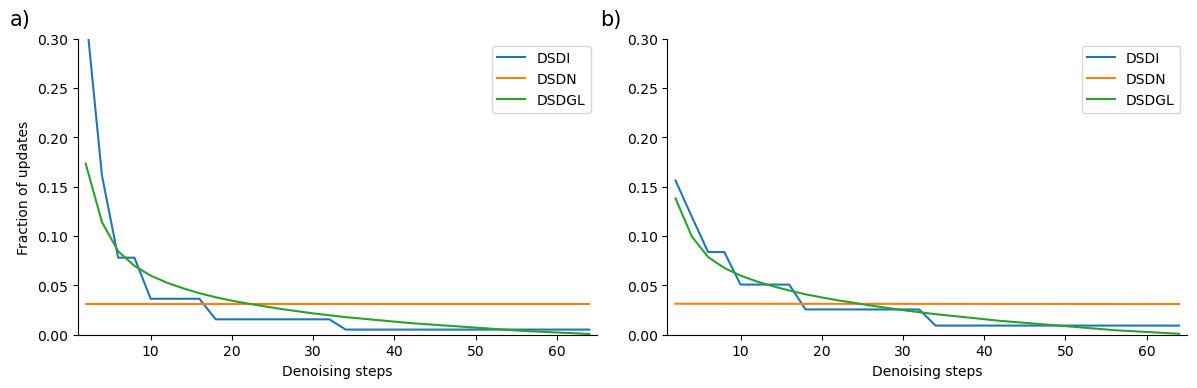

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Code for the first plot
iterative = return_witnessed(*return_schedule("iterative"))
naive = return_witnessed(*return_schedule("naive"))
gradual_linear = return_witnessed(*return_schedule("gradual_linear"))
# gradual_exp = return_witnessed(*return_schedule("gradual_exp"))

x = list(iterative.keys())[:32]
iterative_values = np.array(list(iterative.values()))[:32] / np.sum(list(iterative.values())[:32])
naive_values = np.array(list(naive.values()))[:32] / np.sum(list(naive.values())[:32])
gradual_linear_values = np.array(list(gradual_linear.values()))[:32] / np.sum(list(gradual_linear.values())[:32])
gradual_exp_values = np.array(list(gradual_exp.values()))[:32] / np.sum(list(gradual_exp.values())[:32])

# Create the first plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x, iterative_values, label="DSDI")
ax1.plot(x, naive_values, label="DSDN")
ax1.plot(x, gradual_linear_values, label="DSDGL")
# ax1.plot(x, gradual_exp_values, label="gradual_exp")
ax1.legend()
ax1.set_xlabel("Denoising steps")
# ax1.grid()
# ax1.set_title("Comparison of DSD updates")
ax1.set_ylabel("Fraction of updates")

# Code for the second plot
iterative = return_witnessed(*return_schedule("iterative"), cosine=True)
naive = return_witnessed(*return_schedule("naive"), cosine=True)
gradual_linear = return_witnessed(*return_schedule("gradual_linear"), cosine=True)
# gradual_exp = return_witnessed(*return_schedule("gradual_exp"), cosine=True)

x = list(iterative.keys())[:32]
iterative_values = np.array(list(iterative.values()))[:32] / np.sum(list(iterative.values())[:32])
naive_values = np.array(list(naive.values()))[:32] / np.sum(list(naive.values())[:32])
gradual_linear_values = np.array(list(gradual_linear.values()))[:32] / np.sum(list(gradual_linear.values())[:32])
gradual_exp_values = np.array(list(gradual_exp.values()))[:32] / np.sum(list(gradual_exp.values())[:32])

# Create the second plot
ax2.plot(x, iterative_values, label="DSDI")
ax2.plot(x, naive_values, label="DSDN")
ax2.plot(x, gradual_linear_values, label="DSDGL")
# ax2.plot(x, gradual_exp_values, label="gradual_exp")
ax2.legend()
ax2.set_xlabel("Denoising steps")
# ax2.grid()
# ax2.set_title("Comparison of weighted DSD updates")
# ax2.set_ylabel("Fraction of updates")

# Remove the top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add markers indicating (a) and (b)
ax1.text(-0.13, 1.1, "a)", transform=ax1.transAxes, fontsize=15, va="top")
ax2.text(-0.13, 1.1, "b)", transform=ax2.transAxes, fontsize=15, va="top")
ax2.set_ylim(0, 0.3)
ax1.set_ylim(0, 0.3)
ax2.set_xlim(1, 65)
ax1.set_xlim(1, 65)
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()